# 2016-07-09 Quintile visualization #

**Purpose:** Create visualization of skewed data

In [287]:
import numpy as np
import os

In [288]:
import matplotlib.pyplot as plt
%matplotlib inline

In [449]:
np.logspace(-1,0,4)

array([ 0.1       ,  0.21544347,  0.46415888,  1.        ])

# Setup #

In [289]:
# input data file
a = np.genfromtxt('inData.csv', delimiter=',', skip_header=2)

In [290]:
# Some control values: levels#
levs = np.array([1., 10., 50., 100])  # as percentages
fontMin = 8.
fontMax = 12.
shadeMin = 0.1
shadeMax = 0.6

fontSzs = np.linspace(fontMin, fontMax, np.size(levs))
shades = np.linspace(shadeMin, shadeMax, np.size(levs))[::-1]

In [291]:
# values - FOR DEVELOPMENT #
vals = np.array([51.43, 94.29, 111.43, 120.])
#vals = np.array([51.43, 94.29, 120., 120.])
isLegend=True



In [307]:
# for actual use:
yOffset = 0.07
shoValues = True
joinLines = False
widthVary = False
upperAndLower = False
avoidCollision = True
nudgeThird = True
showPercentages = True

In [467]:
# turn our notes into a method

def shoStrip(vals=np.array([]), isLegend=False, yOffset = 0.08, \
             shoValues = True, joinLines = False, \
             widthVary = False, upperAndLower = False, \
             avoidCollision = True, nudgeThird = True, \
             showPercentages = True, fontMin = 6., \
             fontMax = 10., shadeMin = 0.01, shadeMax = 0.7, \
            figfil='dummy.pdf', figdir='plots'):

    if np.size(vals)< 1:
        return
    
    levs = np.array([1., 10., 50., 100])  # as percentages
    fontSzs = np.linspace(fontMin, fontMax, np.size(levs))
    shades = np.linspace(shadeMin, shadeMax, np.size(levs))[::-1]
    #shades = 1.0 - np.logspace(-2,0,4)
    #shades[0] = 0.85
    
    # WARN - hardcode!
    shades= np.array([0.7, 0.6, 0.5, 0.0])
    
    # now try a plot
    
    # UPDATE - rescaling 2.80, 0.5
    
    buf = 0.01
    plt.figure(1, figsize=(2.83,0.5), dpi=400)
    plt.subplots_adjust(left=buf, right=1.-buf, top=1.-buf, bottom=buf)
    plt.clf()
    
    if isLegend:
        #shoValues = False
        #vals = levs * (np.max(vals)/100.)
        vals = np.array([51.43, 80.29, 104.43, 120.])
        vals = np.linspace(2., 140., 4, endpoint=False)
        nudgeThird = False
        showPercentages = True

        # levels to display if doing legend
        sLegs = ['lowest', 'low', 'median', 'highest']
        sComm = ['(1%s)' % ('%'), \
                 '(10%s)' % ('%'), \
                 '(50%s)' % ('%'), \
                '(100%s)' % ('%')]
        #sComm = ['lowest', 'low', 'median', 'highest']
    
    maxPoss = np.max(vals)
    
    plt.plot(vals, np.repeat(0, np.size(vals)), color='w', marker='o', markeredgecolor='w')
    if not isLegend:
        plt.plot([0., maxPoss], [0., 0.], color=str(np.max(shades)+0.05))
    plt.xlim(0.-0.05*maxPoss, maxPoss*1.2)
    for iData in range(np.size(levs)):
    
        xThis = vals[iData]
    
        # Set the markersize appropriately
        mSz = 4+np.float(iData)*2.
    
        if isLegend:
            #yVert = -0.15 + 0.1 * iData
            yVert = 0.
            plt.plot(xThis, yVert, \
                        marker='o', \
                     markersize=mSz, \
                     color=str(shades[iData]), \
                    markeredgecolor='w', \
                     markeredgewidth=1, \
                    zorder=10-iData)

            if shoValues:
                fontSzs = np.repeat(fontMin, np.size(vals))

            xSpacer = 3.
            plt.annotate(sLegs[iData], (xThis+xSpacer, yVert), xycoords='data', \
                        ha='left', va='center', \
                    color=str(shades[iData]), fontsize=fontSzs[iData])
            plt.annotate(sComm[iData], (xThis+xSpacer, yVert-0.08), xycoords='data', \
                        ha='left', va='center', \
                    color=str(shades[iData]), fontsize=fontSzs[iData])


            continue
    
        yNudge = 0.
        sLevl = '%i%s' % (levs[iData], '%')
        if shoValues:
            if iData == 2 and nudgeThird:
                yNudge = 0.08
            sThis = '%.2f' % (vals[iData])
            fontSzs = np.repeat(fontMin, np.size(levs))
            plt.annotate(sThis, (xThis, yOffset+yNudge), xycoords='data', \
                    ha='center', va='center', \
                    color=str(shades[iData]), \
                         fontsize=fontSzs[iData])
    
        # vertical value for point plot
        yVert = 0.
        if avoidCollision and iData > 0:
            iPoss = range(iData)
            #dum = iPoss.pop(iData)
            lPoss = np.asarray(iPoss, 'int')
            diffs = np.abs(vals[lPoss]-xThis)
        
            if np.min(diffs) < 4.:
                yVert = -0.03
        
            #print iPoss, diffs
        
        
        plt.plot(vals[iData], yVert, \
                    marker='o', \
                 markersize=mSz, \
                 color=str(shades[iData]), \
                markeredgecolor='w', \
                 markeredgewidth=1, \
                zorder=10-iData)

        if isLegend:
            plt.annotate(sLegs[iData], (xThis, 0.+yOffset), xycoords='data', \
                        ha='center', va='center', \
                    color=str(shades[iData]), fontsize=fontSzs[iData])
    
        lineY = np.array([0.00, 0.15]) # was 0.1
        lineX = np.repeat(levs[iData] * maxPoss/100., 2)

        lww = 1.
        if widthVary:
            lww = 1+iData*2
    
        if not isLegend:
            # show a check on the graph for the expected location
            plt.plot(lineX, 0.-lineY, color=str(shades[iData]), lw=lww)
            if upperAndLower:
                plt.plot(lineX, lineY, color=str(shades[iData]), lw=lww)

            # annotate the expected percentage?
            if showPercentages:
                xOff = 1. * maxPoss/120.
                plt.annotate('%s' % (sLevl), (lineX[0]+xOff, 0.-np.max(lineY)-0.01), \
                            xycoords='data', \
                            ha='left', va='bottom', \
                            color=str(shades[iData]), fontsize=fontSzs[iData])
    
        if joinLines:
            xLo = lineX[0]
            xHi = xThis
            yLo = 0.-np.min(lineY)
            yHi = 0.
        
            plt.plot([xLo, xHi], [yLo, yHi], lw='1', \
                     color=str(shades[iData]), ls='-')
    
    #plt.plot(levs[iData], 0., marker='+', color=str(shades[iData]), \
    #            markerSize=fontSzs[iData])
        
    plt.ylim(-0.2, 0.22)
    ax = plt.gca()
    ax.yaxis.set_visible(False)
    dum = ax.axis('off')
    
    if not os.access(figdir, os.R_OK):
        os.mkdir(figdir)
    
    figPath = '%s/%s' % (figdir, figfil)
    
    plt.savefig(figPath)

## run programmatically ##

In [468]:
print xSpacer

5.0


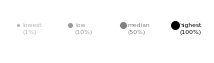

In [469]:
shoStrip(a[iRow], True, figfil='row_00_legend.pdf')

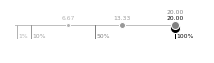

In [470]:
nRows = np.shape(a)[0]
for iRow in range(nRows):
    if iRow < nRows - 1:
        showPct = False
    else:
        showPct = True
    shoStrip(a[iRow], False, figfil='row_%s.pdf' % (str(iRow+1).zfill(2)), showPercentages=showPct)

In [471]:
print sThis

120.00
